# Load Tools

In [15]:
import tensorflow

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import Adam
import cv2
import os
import random

# IMPORTING IMAGE

In [69]:
# Define dataset path
path = "train"


count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected: ", len(myList))
noOfClasses = len(myList)
print("Importing...........")

for x in range(0,len(myList)):
    myPicList = os.listdir(path + "/" + str(count))  
    for y in myPicList:
        curImg = cv2.imread(path + "/" +str(count) + "/" + y)
        images.append(curImg)
        classNo.append(count)
    print(count, end = " ")
    count += 1

# Convert lists to NumPy arrays
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected:  33
Importing...........
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

# Parameters For Training

In [70]:
labelFile = "Labels.csv"
batch_size_val = 50
steps_per_epochs_val = 2000
epochs_val = 10
imageDimensions = (100, 100, 3)
testRatio = 0.2
validationRatio = 0.2

# Splitting Data

In [71]:
X_train , X_test, y_train, y_test = train_test_split(images, classNo, test_size = testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(images, classNo, test_size = validationRatio)

In [72]:
# X_train =  Array of Images to Train
# y_train = Corresponding Class ID

# To Check If Number Of Images Matches To Number Of Labels For Each Data Set

In [73]:
print("Data Shape")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)
assert(X_train.shape[0]==y_train.shape[0]), "The number of images in not equal to the number of lables in training set"
assert(X_validation.shape[0]==y_validation.shape[0]), "The number of images in not equal to the number of lables in validation set"
assert(X_test.shape[0]==y_test.shape[0]), "The number of images in not equal to the number of lables in test set"
assert(X_train.shape[1:]==(imageDimensions))," The dimesions of the Training images are wrong "
assert(X_validation.shape[1:]==(imageDimensions))," The dimesionas of the Validation images are wrong "
assert(X_test.shape[1:]==(imageDimensions))," The dimesionas of the Test images are wrong"

Data Shape
Train(13483, 100, 100, 3) (13483,)
Validation(3371, 100, 100, 3) (3371,)
Test(3371, 100, 100, 3) (3371,)


# Read CSV File

In [74]:
data = pd.read_csv("Labels.csv")
print("Data shape", data.shape, type(data))

Data shape (33, 2) <class 'pandas.core.frame.DataFrame'>


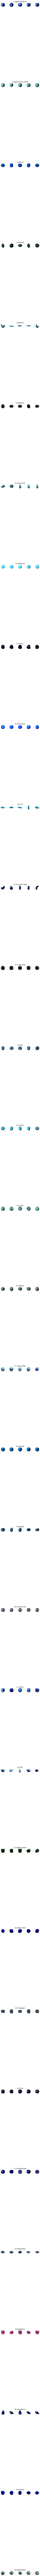

In [75]:
num_of_samples = []
cols = 5
num_classes = noOfClasses
fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 300))
fig.tight_layout()
for i in range(cols):
    for j,row in data.iterrows():
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected) -1), :, :], 
                         cmap = plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i == 2:
            axs[j][i].set_title(str(j) + "_" + row["Name"])
            num_of_samples.append(len(x_selected))

In [76]:
print(num_of_samples)

[392, 389, 412, 345, 385, 373, 391, 394, 399, 416, 371, 318, 791, 391, 389, 386, 381, 339, 390, 390, 378, 387, 559, 360, 521, 394, 365, 385, 360, 385, 381, 591, 375]


[392, 389, 412, 345, 385, 373, 391, 394, 399, 416, 371, 318, 791, 391, 389, 386, 381, 339, 390, 390, 378, 387, 559, 360, 521, 394, 365, 385, 360, 385, 381, 591, 375]


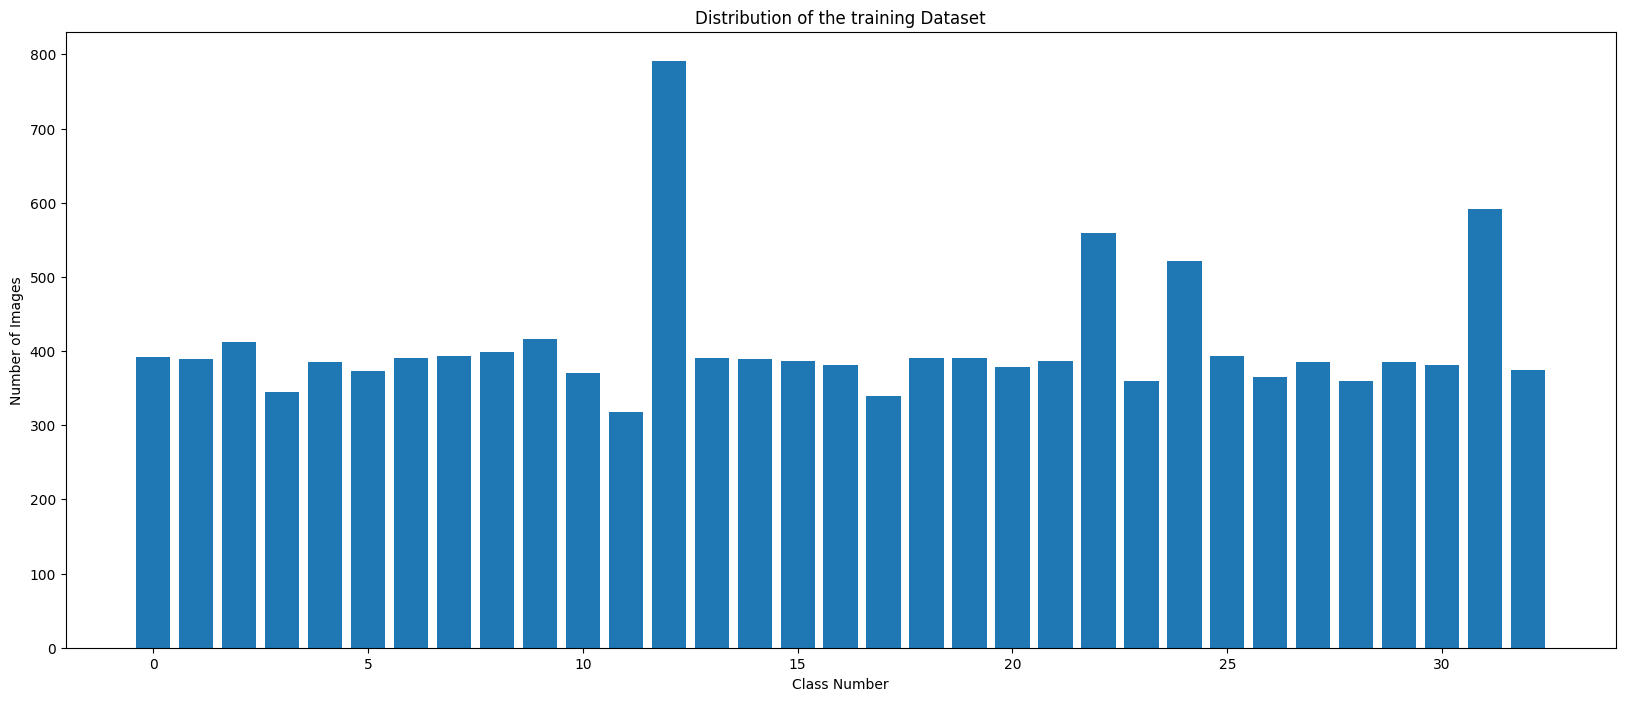

In [77]:
print(num_of_samples)
plt.figure(figsize = (20, 8))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training Dataset")
plt.xlabel("Class Number")
plt.ylabel("Number of Images")
plt.show()

# Processing the Image 

In [78]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def equalize(img):
    img = cv2.equalizeHist(img)
    return img

def preprocessing(img):
    img = grayscale(img)   #Convert to GRAY
    img = equalize(img)    # Standradize lighting in the Image
    img = img/255          # Normalize into 0, 1 
    return img

In [80]:
X_train = np.array(list(map(preprocessing, X_train)))  # TO ITERATE AND PREPROCESS ALL IMAGES
X_validation = np.array(list(map(preprocessing, X_validation)))
X_test = np.array(list(map(preprocessing, X_test)))

# ADD A DEPTH OF  RESHAPING TRAINING TESTING AND VALIDATION DATA

In [82]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],X_train.shape[2],1)
X_validation = X_validation.reshape(X_validation.shape[0], X_validation.shape[1],X_validation.shape[2],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],X_test.shape[2],1)

# AUGMENTATION OF IMAGES : TO MAKE IT MORE GENERIC

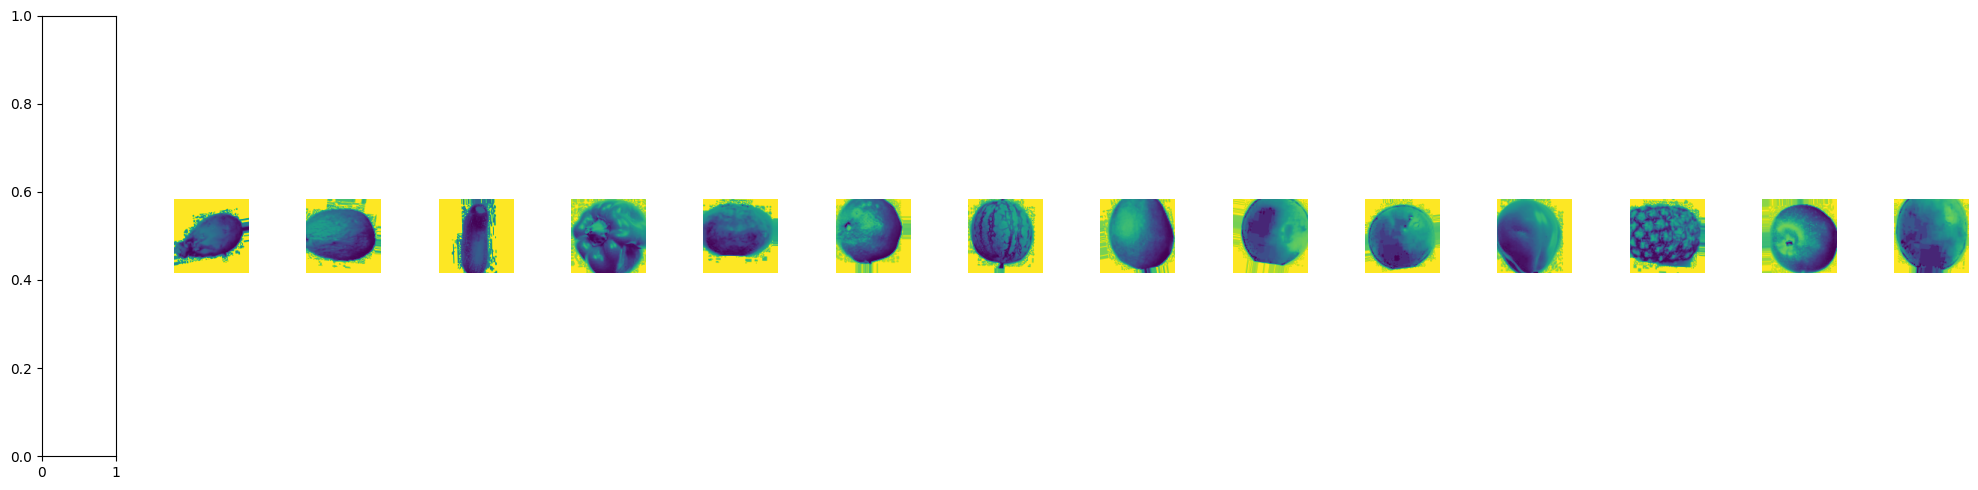

In [86]:
dataGen = ImageDataGenerator(
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.2,
    zoom_range = 0.1,
    rotation_range = 10
)

dataGen.fit(X_train)

batches = dataGen.flow(X_train, y_train, batch_size = 20) # REQUESTING DATA GENRATOR TO GENERATE IMAGES  BATCH SIZE = NO. OF IMAGES CREAED EACH TIME ITS CALLED
X_batch, y_batch = next(batches)


 # To show Samples Images

fig, axs = plt.subplots(1,15,figsize = (20, 5))
fig.tight_layout()

for i in range(1, 15):
    axs[i].imshow(X_batch[i].reshape(imageDimensions[0],imageDimensions[1]))
    axs[i].axis("off")

plt.show()

In [87]:
y_train = to_categorical(y_train, noOfClasses)
y_validation = to_categorical(y_validation, noOfClasses)
y_test = to_categorical(y_test, noOfClasses)

# CONVOULUATIONAL NEURAL NETWORK LAYERS

In [91]:
model = Sequential()

# First Layer
model.add((Conv2D(filters = 60, kernel_size = (5, 5), activation = "relu", input_shape = (imageDimensions[0],imageDimensions[1],1))))
model.add((Conv2D(filters = 60, kernel_size = (5, 5), activation = "relu")))
model.add((MaxPooling2D(pool_size = (2,2))))

# Second Layer
model.add((Conv2D(filters = 60//2, kernel_size = (3,3), activation = "relu")))
model.add((Conv2D(filters = 60//2, kernel_size = (3,3), activation = "relu")))
model.add((MaxPooling2D(pool_size = (2,2))))
model.add((Dropout(0.5)))

# Fully Connected Layer
model.add((Flatten()))

model.add(Dense(units = 500, activation = "relu"))
model.add(Dropout(0.5))

# Output Layer

model.add(Dense(units = noOfClasses, activation = "softmax"))


# model compile

model.compile(Adam(learning_rate = 0.001), loss = "categorical_crossentropy", metrics = ["accuracy"])

# summary
model.summary()

C:\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 96, 96, 60)          │           1,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 92, 92, 60)          │          90,060 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 46, 46, 60)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 44, 44, 30)          │          16,230 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 42, 42, 30)          │           8,130 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 21, 21, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 21, 21, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 13230)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │       6,615,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 33)                  │          16,533 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,748,013 (25.74 MB)

 Trainable params: 6,748,013 (25.74 MB)

 Non-trainable params: 0 (0.00 B)

# Train Model

In [92]:
history = model.fit(dataGen.flow(X_train, y_train, batch_size = batch_size_val),
          steps_per_epoch = steps_per_epochs_val, epochs = epochs_val,
          validation_data = (X_validation, y_validation), shuffle = 1
         )

Epoch 1/10


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 270/2000 ━━━━━━━━━━━━━━━━━━━━ 49:26 2s/step - accuracy: 0.2444 - loss: 2.6087

C:\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 518s 257ms/step - accuracy: 0.3878 - loss: 2.0208 - val_accuracy: 0.8478 - val_loss: 0.4750
Epoch 2/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 689s 344ms/step - accuracy: 0.7099 - loss: 0.8780 - val_accuracy: 0.9279 - val_loss: 0.2568
Epoch 3/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 688s 343ms/step - accuracy: 0.8022 - loss: 0.5756 - val_accuracy: 0.9653 - val_loss: 0.1286
Epoch 4/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 693s 345ms/step - accuracy: 0.8367 - loss: 0.4682 - val_accuracy: 0.9810 - val_loss: 0.0692
Epoch 5/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 705s 351ms/step - accuracy: 0.8746 - loss: 0.3705 - val_accuracy: 0.9867 - val_loss: 0.0519
Epoch 6/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 705s 351ms/step - accuracy: 0.8968 - loss: 0.3073 - val_accuracy: 0.9899 - val_loss: 0.0337
Epoch 7/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 711s 354ms/step - accuracy: 0.9097 - loss: 0.2672 - val_accuracy: 0.9938 - val_loss: 0.0234
Epoch 8/10
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 717s 357ms/step - accuracy: 0.9

# Plot 

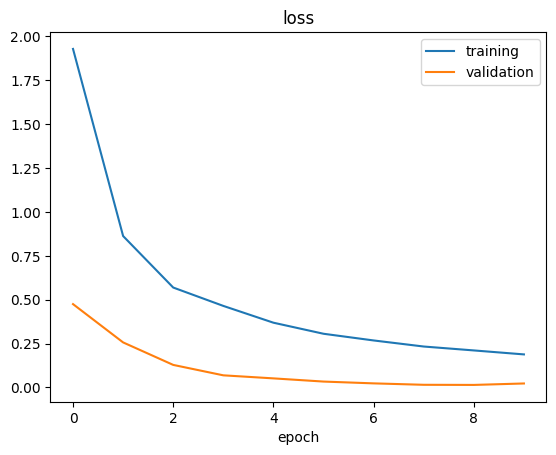

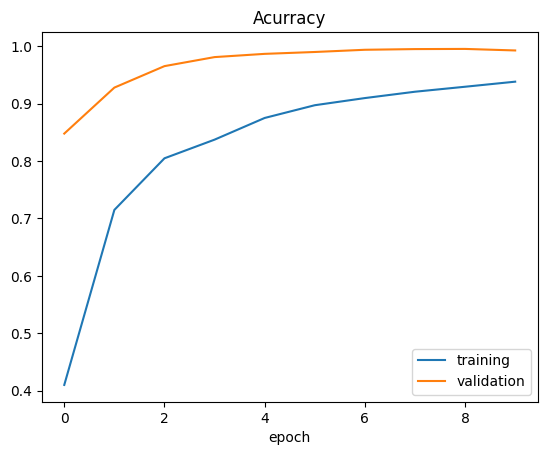

Test Score: 0.016811328008770943
Test Accuracy: 0.9946603178977966


In [93]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])

In [94]:
import joblib
joblib.dump(model, "fruit_model.joblib")

['fruit_model.joblib']